# Model on prediction of demand of Bike Sharing ('BoomBikes') with Multiple Linear Regression

#### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Step 1: Reading and Understanding the Data

In [87]:
# Supress Warnings and importing necessary libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# Importing Day.csv
day = pd.read_csv('day.csv')

# Looking at the first five rows
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [89]:
day.shape

(730, 16)

In [90]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [91]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


We are dropping columns below columns:
    
- instant - Because it is a serial number progression, no valuable data itself
- dteday - Dates are not going to important in model buildong
- mnth,weekday - We can have some relation between cnt and mnth, weekday, but splitting them into dummy variables will add too many columns and make our model far too complex, for very little slope coeffiecients.

In [92]:
day = day.drop(columns=['instant','dteday','mnth','weekday'])

day.head()

,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,0,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Step 2: Visualising the Data


#### Visualizing Numerical data

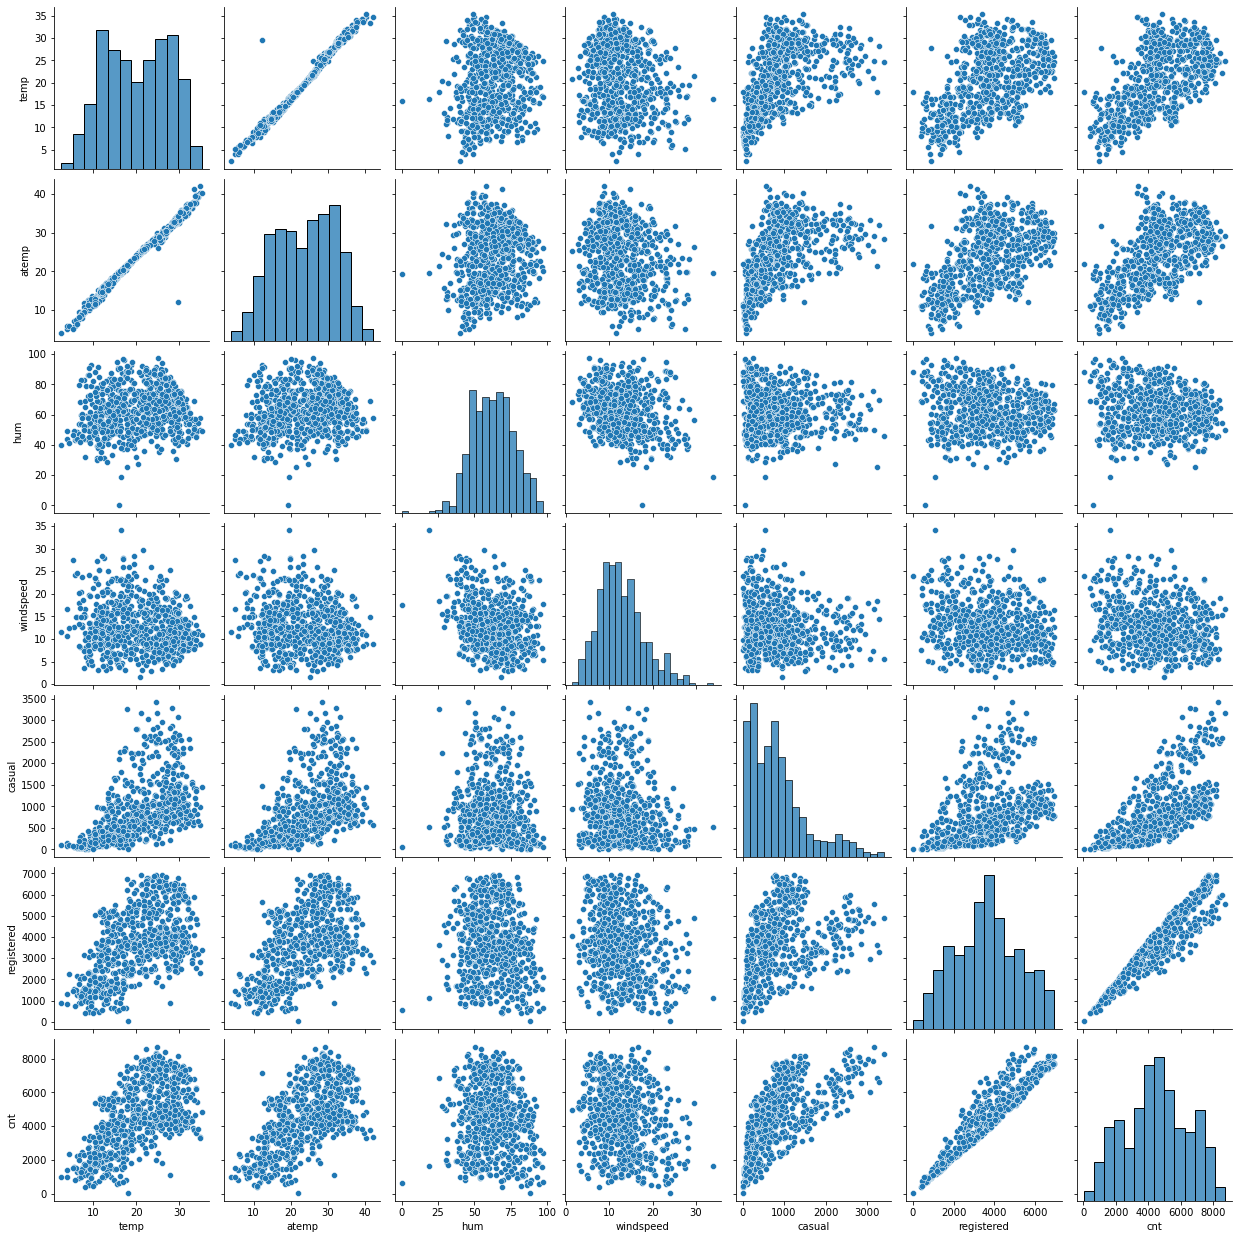

In [93]:
#Let us visualize the pair plots among numeric variables, to see relations among them

sns.pairplot(day, vars = ['temp','atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'])

plt.show()

We can see that cnt has high correlation with registered, casual, temp.

#### Visualizing categorical data

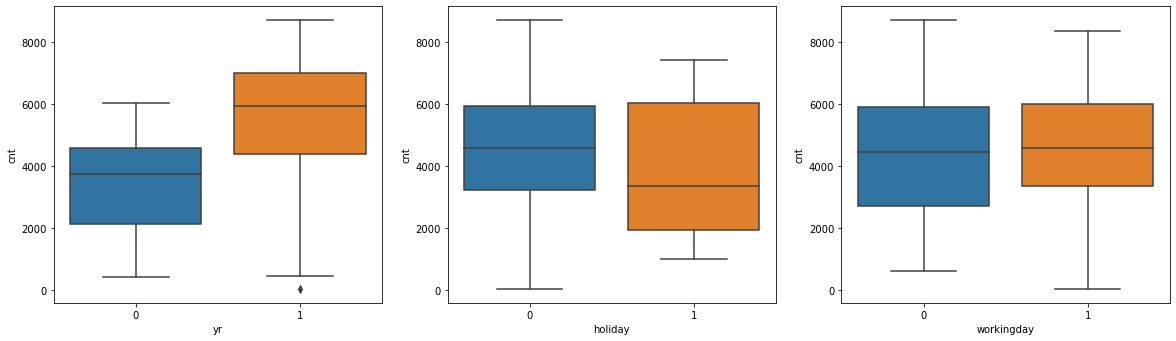

In [94]:
#Let us visualize relation between cnt and yr, holiday, workingday

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(2,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(2,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)

plt.show()

#### Inferences:
- yr is positively related to cnt. 
- We have more cnt on holiday. 
- We have more cnt on non-working day.

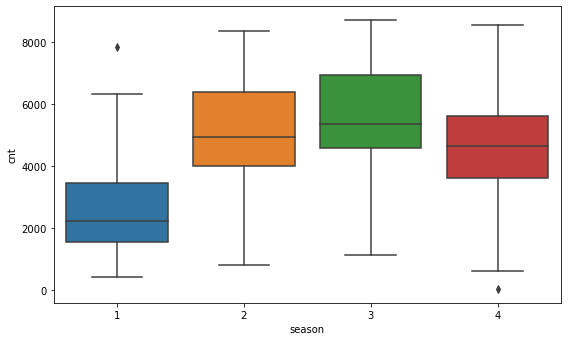

In [95]:
#Let us visualize relation between cnt and season

plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.show()

#### Inferences:
- 2 -summer and 3 - fall have larger use of bikes

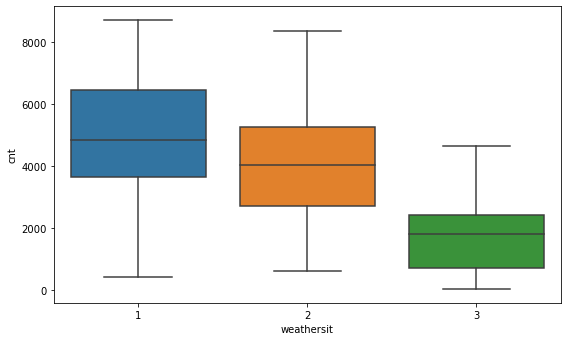

In [96]:
#Let us visualize relation between cnt and weathersit

plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.show()

#### Inferences:
- clear weather(1) has largest use of bikes, followed by misty/cloudy (2) and rainy/thunderstorm(3). 

#### Checking for outliers and treating them

<AxesSubplot:xlabel='windspeed'>

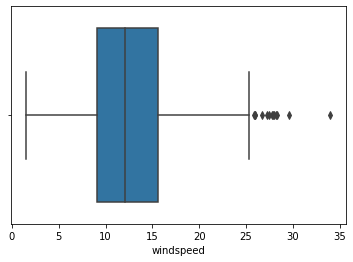

In [97]:
sns.boxplot(day['windspeed'])

In [98]:
quantile_info = day.windspeed.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info


#The values after 98 percentile seems to be disconected from the general distribution and also 
#there is huge increase in the value for small quantile variation.
#So, considering threshold for removing outliers as 0.98


0.50    12.125325
0.75    15.625589
0.90    19.833997
0.95    22.999988
0.97    23.999167
0.98    25.201627
0.99    27.380948
Name: windspeed, dtype: float64

In [99]:
per_98_windspeed = day['windspeed'].quantile(0.98)
day = day[day.windspeed <= per_98_windspeed]

<AxesSubplot:xlabel='windspeed'>

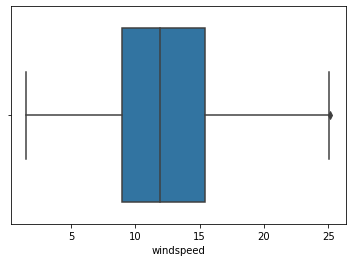

In [100]:
sns.boxplot(day.windspeed)

<AxesSubplot:xlabel='hum'>

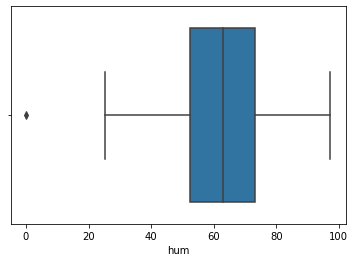

In [101]:
sns.boxplot(day['hum'])

In [102]:
quantile_info = day.hum.quantile([0.01,0.02,0.03,0.04,0.05,0.1,0.20,0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

#The values before 1 percentile seems to be disconected from the general distribution and also 
#there is huge increase in the value for small quantile variation.
#So, considering threshold for removing outliers as 0.01

0.01    31.419234
0.02    36.011676
0.03    39.199200
0.04    40.200004
0.05    41.087500
0.10    45.683340
0.20    50.388040
0.50    63.083300
0.75    73.270850
0.90    81.900020
0.95    87.050010
0.97    89.605800
0.98    90.918324
0.99    92.858362
Name: hum, dtype: float64

In [103]:
per_01_hum = day['hum'].quantile(0.01)
day = day[day.hum >= per_01_hum]

<AxesSubplot:xlabel='hum'>

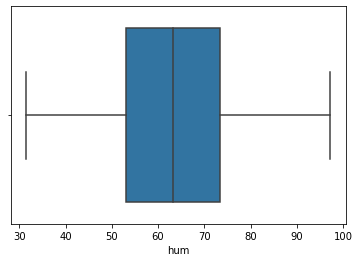

In [104]:
sns.boxplot(day.hum)

### Step 3: Data Preparation


We can see that our dataset has many columns with values as '1', '2', '3' or '4'. In order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No.

In [105]:
# Mapping string values to categorical columns

day["season"] = day["season"].replace({1:'Spring',2:"Summer",3:"Fall",4:"Winter"})
day["weathersit"] = day["weathersit"].replace({1:"Clear",2:"MistCloudy",3:"LightSnowRain",4:"HeavyRain"})

day.head()

,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,0,0,MistCloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,0,0,MistCloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [106]:

Status_season = pd.get_dummies(day['season'], drop_first = True)
Status_weathersit = pd.get_dummies(day['weathersit'], drop_first = True)


#### Dummy Variables


In [107]:

Status_season.head()


,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [108]:
Status_weathersit.head()

,LightSnowRain,MistCloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [109]:
# adding the dummy variables to the dataframe
day = pd.concat([day, Status_weathersit, Status_season], axis = 1)

In [110]:
day.head()

,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,LightSnowRain,MistCloudy,Spring,Summer,Winter
0,Spring,0,0,0,MistCloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,0,0
1,Spring,0,0,0,MistCloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,0,0
2,Spring,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,Spring,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,Spring,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0


In [111]:
# Dropping the categorical features after creating the dummy variables of their option values.
day = day.drop(['season','weathersit'], axis = 1)

In [112]:
day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,LightSnowRain,MistCloudy,Spring,Summer,Winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0


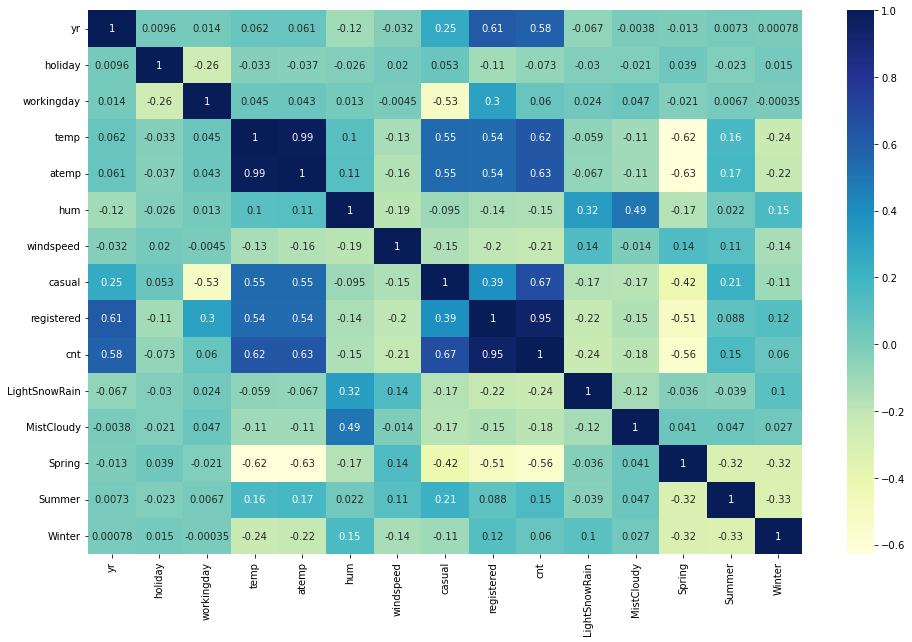

In [113]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(day.corr(), annot = True, cmap="YlGnBu")
plt.show()

We can see that there multiple correlations among variables and target variable.

Casual and Registered are having high correlations with other predictor variables ( more than value of 0.4 with 5 predictor variables each). Hence, dropping both of these.

In [114]:
day = day.drop(columns=['casual','registered'])


day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,LightSnowRain,MistCloudy,Spring,Summer,Winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0


### Step 4: Splitting the Data into Training and Testing Sets


In [115]:


from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)



#### Rescaling the Features


In [116]:
#Imorting library:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


In [117]:

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()



,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,LightSnowRain,MistCloudy,Spring,Summer,Winter
360,0,0,1,0.331287,0.326273,0.679389,0.470120,0.088253,0,1,1,0,0
683,1,0,1,0.327133,0.322150,0.462469,0.369722,0.605336,0,1,0,0,1
728,1,0,0,0.245101,0.200348,0.253180,0.929611,0.164795,0,0,1,0,0
672,1,0,0,0.332325,0.328774,0.328881,0.443672,0.564530,0,0,0,0,1
118,0,0,1,0.561806,0.549198,0.213104,0.616239,0.502716,0,0,0,1,0


#### Dividing into X and Y sets for the model building

In [118]:

y_train = df_train.pop('cnt')
X_train = df_train


### Step 5: Building a linear model

In [119]:

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [120]:

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [121]:

list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('LightSnowRain', True, 1),
 ('MistCloudy', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [122]:

col = X_train.columns[rfe.support_]
col


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'LightSnowRain', 'MistCloudy', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [123]:

X_train.columns[~rfe.support_]


Index([], dtype='object')

In [124]:

# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [125]:

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)


In [126]:

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model


In [127]:

#Let's see the summary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          8.34e-175
Time:                        15:57:09   Log-Likelihood:                 446.33
No. Observations:                 494   AIC:                            -866.7
Df Residuals:                     481   BIC:                            -812.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2368      0.035      6.841

#### Dropping the variable and updating the model

We are dropping workingday, atemp and Summer, because they are showing a high p-value (>0.05)- meaning that these variables are less statistically significant.

In [128]:

X_train_lm = X_train_rfe.drop(["workingday","atemp","Summer"], axis = 1)


In [129]:

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model


In [130]:

#Let's see the summary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     255.5
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.37e-177
Time:                        15:57:15   Log-Likelihood:                 444.45
No. Observations:                 494   AIC:                            -868.9
Df Residuals:                     484   BIC:                            -826.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2708      0.029      9.230

Now, the p-values of all the predictor variables are very low (lesser than 0.05), so let us check correlation among variables with VIF.

In [131]:

X_train_lm.columns


Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'LightSnowRain',
       'MistCloudy', 'Spring', 'Winter'],
      dtype='object')

#### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other.

In [132]:

#Dropping constant

X_train_lm_VIF = X_train_lm.drop(['const'], axis=1)


In [133]:

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm_VIF
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,hum,11.00
2,temp,8.86
4,windspeed,5.06
6,MistCloudy,2.55
0,yr,2.10
7,Spring,2.07
8,Winter,1.77
5,LightSnowRain,1.41
1,holiday,1.04


#### Dropping the variable and updating the model

Since the VIF of hum is very high (>5), this means it is highly correlated to other predictor variables, hence dropping it.

In [134]:
#Dropping hum

X_train_lm = X_train_lm.drop(["hum"], axis = 1)

In [135]:

# Adding a constant variable 

#X_train_lm2 = sm.add_constant(X_train_lm)

In [136]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model


In [137]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     273.9
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.81e-174
Time:                        15:57:20   Log-Likelihood:                 434.19
No. Observations:                 494   AIC:                            -850.4
Df Residuals:                     485   BIC:                            -812.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2220      0.028      7.976

P-values are still very low, after dropping hum, so let us now check VIF again.

In [138]:
#X_train_new.columns
#ska

X_train_lm.columns


Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'LightSnowRain',
       'MistCloudy', 'Spring', 'Winter'],
      dtype='object')

In [139]:
#X_train_new = X_train_new.drop(['const'], axis=1)
#ska

X_train_lm_VIF = X_train_lm.drop(['const'], axis=1)



In [140]:

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm_VIF
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,windspeed,5.03
2,temp,4.14
0,yr,2.08
6,Spring,1.74
5,MistCloudy,1.57
7,Winter,1.40
4,LightSnowRain,1.10
1,holiday,1.04


In [141]:
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'LightSnowRain',
       'MistCloudy', 'Spring', 'Winter'],
      dtype='object')

#### Dropping the variable and updating the model

Since the VIF of windspeed is high (>5), this means it is highly correlated to other predictor variables, hence dropping it.

In [142]:
X_train_lm = X_train_lm.drop(["windspeed"], axis = 1)

In [143]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model


In [144]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     303.1
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          8.48e-173
Time:                        15:57:24   Log-Likelihood:                 427.30
No. Observations:                 494   AIC:                            -838.6
Df Residuals:                     486   BIC:                            -805.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1724      0.025      6.976

The p-values are very low and R-square is 0.814, which is pretty good, so let us check VIF again.

In [145]:
X_train_lm_VIF = X_train_lm.drop(['const'], axis=1)

In [146]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm_VIF
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.24
0,yr,2.07
4,MistCloudy,1.53
6,Winter,1.32
5,Spring,1.25
3,LightSnowRain,1.06
1,holiday,1.04


#### Final Inference:
Now, the 4th model that we have received, has p-values all less than 0.05 and VIF of all variables is also less than 5. The R square is preety high of 0.814- which is a good score. Let us finalize this model and continue further.

In [147]:
#y_train_price = lm.predict(X_train_lm)
#ska

y_train_cnt = lm.predict(X_train_lm)



In [148]:
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'temp', 'LightSnowRain', 'MistCloudy',
       'Spring', 'Winter'],
      dtype='object')

### Step 6: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [149]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

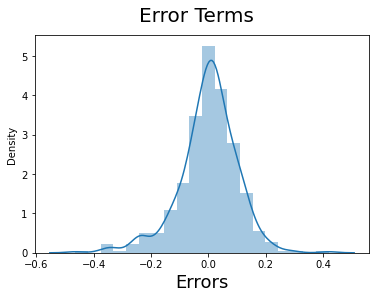

In [150]:
# Plot the histogram of the error terms
fig = plt.figure()
#sns.distplot((y_train - y_train_price), bins = 20)
#ska

sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Step 7: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [151]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables


num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])


In [152]:

y_test = df_test.pop('cnt')
X_test = df_test


In [153]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test


X_test_new = X_test[X_train_lm_VIF.columns]


# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


In [154]:

# Making predictions
y_pred = lm.predict(X_test_new)



### Step 8: Model Evaluation
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

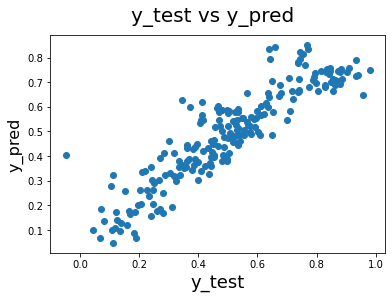

In [155]:

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label



#### R square

In [156]:

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.8083399028896253

#### Adjusted R square

In [157]:
print(lm.rsquared_adj)

0.8109462890022179


The final equation of the Target variable 'cnt' with respect to all the Predictor variabes is : 

cnt = 0.2401yr - 0.0985holiday + 0.4623temp - 0.2857lightSnowRain - 0.0754MistCloudy - 0.1258Spring + 0.0587Winter + 0.1724


## Inferences

Inferences wrt to final equation of target variable are:
- +0.2401yr  = There has been a 24.01 % increase in bike use per year.
- -0.0985holiday = Holiday affects the bike use by 9.85 %.
- -0.2857lightSnowRain = When the weather is Light snow or rain, bike use is decreased by 28.57 %.
- -0.0754MistCloudy = When the weather is mist/cloudy, bike share use decreases by 7.54 %.
- -0.1258Spring = During Spring season, bike use decreases by 12.58 %.
- +0.0587Winter = Winter sees an increase in bike sharing by 5.87 %.


R square of final model built is 0.8083, and the adjusted R square is 0.8109.

We can say that temp (positive relation by slope of 0.4623), year(positive relation by slope of 0.2401) and LightSnowRain(weather being Light snow or rainy with negative slope of 0.2857) are the top 3 features, in order, contributing significantly towards explaining the demand of the shared bikes